In [82]:
import pandas as pd


df = pd.read_csv('data1.csv', encoding='ISO-8859-1')

In [83]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Got an encoded error and have to use encoding='ISO-8859-1 to properly load the data for the analysis

In [84]:
# drop rows with missing values
df.dropna(inplace=True)

# replace values
df.replace({'col1': {'old_value': 'new_value'}})

# fill missing values
df.fillna(value=0, inplace=True)

# get summary of the data used to describe the data or getting the summary statistics
df.describe()


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [85]:
print(df.shape)




(406829, 8)


above code prints the shape of the pandas dataframe df. The shape attribute of a pandas dataframe returns a tuple representing the dimensions of the dataframe, where the first element is the number of rows and the second element is the number of columns. By printing the shape of the dataframe, we can quickly check the size of the dataframe and ensure that it matches our expectations.

we have 406829 rows and 8 columns for this table

In [86]:
print(df.iloc[:, :8])

print(df.columns)
#prints the column names of the dataframe


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [87]:
pivot_df = df.pivot_table(values=['Quantity', 'UnitPrice'], index=['Country', 'CustomerID'])
print(pivot_df)


                            Quantity  UnitPrice
Country        CustomerID                      
Australia      12386.0     35.400000   2.391000
               12388.0     14.620000   2.777700
               12393.0     12.750000   2.279688
               12415.0     99.282776   3.213136
               12422.0      9.285714   2.434286
...                              ...        ...
United Kingdom 18287.0     22.657143   1.493571
Unspecified    12363.0     17.739130   2.311739
               12743.0      2.380597   3.038582
               14265.0     10.645161   5.862903
               16320.0     13.071429   2.480536

[4380 rows x 2 columns]


In [88]:
df['Total Sales'] = df['Quantity'] * df['UnitPrice']

print (df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Total Sales  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  


In [89]:
unique_customers = df.groupby('Country')['CustomerID'].nunique()
print(unique_customers)


Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   95
Greece                     4
Iceland                    1
Israel                     4
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               21
USA                        4
United

We got the unique number of customers from each country 
4 customer did not specify which country they are from and its not significant so can be eliminated from analysis



In [90]:
df.dropna(subset=['Country'], inplace=True)

# count the number of missing values in each column
missing_values_count = df.isna().sum()

# print the result
print(missing_values_count)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total Sales    0
dtype: int64


with above code i can confim there are no missing valuse in the table 

In [91]:
duplicate_rows = df.duplicated()
print("Total number of duplicate rows in the dataframe:", duplicate_rows.sum())


Total number of duplicate rows in the dataframe: 5225


There are 5225 duplicated rows in the tabel and need to remove the dublicates

In [92]:
df.drop_duplicates(inplace=True)
duplicate_rows = df.duplicated()
print("Total number of duplicate rows in the dataframe:", duplicate_rows.sum())




Total number of duplicate rows in the dataframe: 0


Confirmed tatal duplicates to 0 now we have unique data with no missing values and dupplicates

In [93]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [94]:
df['Total Sales'] = df['Quantity'] * df['UnitPrice']

print (df.head())





  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Total Sales  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  


In [95]:

country_sales = df.groupby('Country')['Total Sales'].sum()
print(country_sales)



Country
Australia                137009.770
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    12858.760
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250001.780
European Community         1291.750
Finland                   22326.740
France                   196626.050
Germany                  221509.470
Greece                     4710.520
Iceland                    4310.000
Israel                     6988.400
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  28995.760
RSA                 

Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Name: Total Sales, dtype: float64


<AxesSubplot:xlabel='Country'>

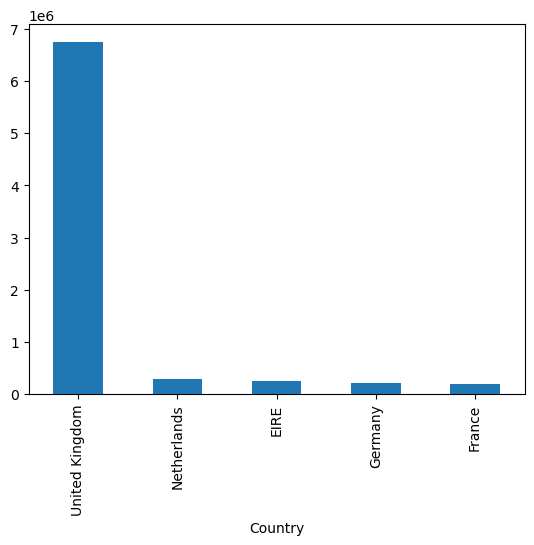

In [96]:
top_5_countries = country_sales.sort_values(ascending=False).head(5)
print(top_5_countries)

top_5_countries.plot(kind='bar')


In [97]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


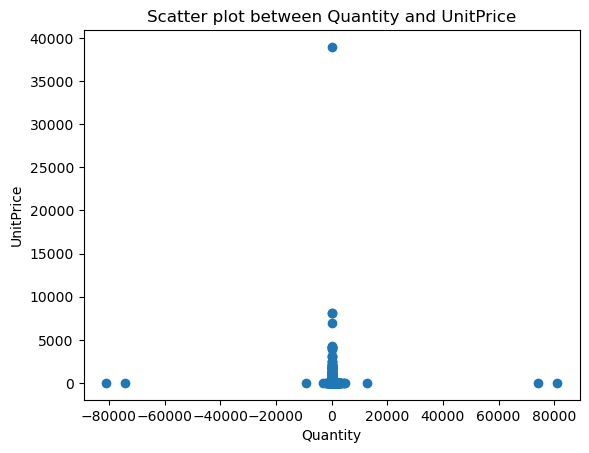

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Total Sales  401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB


In [98]:
import matplotlib.pyplot as plt

plt.scatter(df['Quantity'], df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter plot between Quantity and UnitPrice')
plt.show()

df.info()




In [99]:
# check the distribution of invoice numbers
invoice_counts = df[df['InvoiceNo'].str.startswith('C') == False]['InvoiceNo'].value_counts()
print(invoice_counts)

# check for missing invoice numbers
missing_invoices = set(range(int(invoice_counts.index.min()), int(invoice_counts.index.max()) + 1)) - set(invoice_counts.index.astype(int))
print("Missing invoice numbers:", missing_invoices)

# check for duplicate invoice numbers
duplicate_invoices = df[df.duplicated(['InvoiceNo'], keep=False)]
print("Duplicate invoice numbers:", duplicate_invoices['InvoiceNo'].unique())


576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
574549      1
574576      1
574585      1
541043      1
557252      1
Name: InvoiceNo, Length: 18536, dtype: int64
Missing invoice numbers: {536379, 536383, 536391, 536410, 536411, 536413, 536414, 536417, 536418, 536419, 536421, 536422, 536424, 536426, 536427, 536428, 536429, 536430, 536431, 536432, 536433, 536434, 536435, 536436, 536438, 536439, 536440, 536441, 536442, 536443, 536444, 536445, 536447, 536448, 536449, 536450, 536451, 536452, 536453, 536454, 536455, 536456, 536457, 536458, 536459, 536461, 536462, 536465, 536467, 536468, 536469, 536470, 536471, 536472, 536473, 536474, 536475, 536476, 536478, 536479, 536480, 536481, 536482, 536483, 536484, 536485, 536486, 536487, 536489, 536490, 536491, 536492, 536493, 536494, 536495, 536496, 536497, 536498, 536499, 536501, 536503, 536504, 536505, 536506, 536507, 536509, 536510, 536511, 536512, 536513, 536515, 536516, 536517, 536518, 536519, 536543, 536544,

In [100]:
# check the distribution of invoice numbers
invoice_counts = df[df['InvoiceNo'].str.startswith('C') == False]['InvoiceNo'].value_counts()

# get the total number of unique invoices
total_invoices = len(invoice_counts)

# get the number of missing invoices
missing_invoices = total_invoices - len(df['InvoiceNo'].unique())

print("Total number of unique invoices:", total_invoices)
print("Total number of missing invoices:", missing_invoices)


Total number of unique invoices: 18536
Total number of missing invoices: -3654


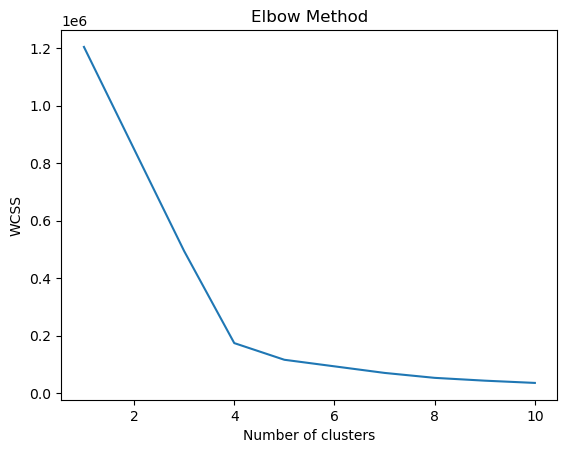

             Quantity  UnitPrice    CustomerID    Total Sales
Cluster                                                      
0           12.183394   3.474083  15281.169634      20.613843
1       -77605.000000   1.560000  14396.000000 -122826.600000
2        77605.000000   1.560000  14396.000000  122826.600000


In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Quantity', 'UnitPrice', 'Total Sales']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to customers
df['Cluster'] = kmeans.predict(X_scaled)

# Analyze the clusters
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


In [102]:
customer_products = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)
print(customer_products.head())


CustomerID
14646.0    196719
12415.0     77242
14911.0     77155
17450.0     69009
18102.0     64122
Name: Quantity, dtype: int64


These customers bought most products they have endency of buying more products hence marketing to these specific customers will help increasing the sales

In [103]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total Sales', 'Cluster'],
      dtype='object')


In [104]:
df['Total Sales'] = df['Quantity'] * df['UnitPrice']
df.head()




df.groupby('Country')['Total Sales'].sum().sort_values(ascending=False).head(20)

monthly_sales = df['Total Sales'].resample('M').sum()

# plot the monthly sales data
plt.plot(monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()









TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

Time series analysis of sales describes most sales happened from November 9th to jan 1st which is crucial period for marketing to increse more salse

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [106]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['StockCode', 'Country'], prefix=['Stock', 'Country'], drop_first=True)

# Label Encoding (for CustomerID if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CustomerID'] = le.fit_transform(df['CustomerID'])


Categorical Encoding:
Encode categorical variables like "StockCode" and "Country" using one-hot encoding or label encoding.

In [108]:
# Example: Count the number of words in the description
df['DescriptionLength'] = df['Description'].apply(lambda x: len(x.split()))


Purchase Frequency:

Purchase Frequency represents how often a customer makes a purchase. You can calculate it as the total number of unique invoices a customer has made. This can help you identify how active your customers are.

In [110]:
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()


Customer Lifetime Value (CLV):

Customer Lifetime Value represents the total revenue a customer is expected to generate throughout their relationship with your business. There are different ways to calculate CLV, but a common approach is to use historical data to predict future customer value. Here's a simplified example of how you can calculate CLV:

In [113]:
# Calculate 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Calculate total spending for each customer
total_spending = df.groupby('CustomerID')['TotalPrice'].sum()


Calculate the average purchase frequency (if not already calculated):



In [114]:
average_purchase_frequency = purchase_frequency.mean()


In [115]:
average_lifespan = 12  # Assume an average customer lifetime of 12 months


In [117]:
CLV = total_spending * (average_purchase_frequency * average_lifespan)

print(CLV)


CustomerID
0            0.000000
1       262503.842635
2       109462.275206
3       107044.925435
4        20366.887466
            ...      
4367     10999.580970
4368      4922.403843
4369     10755.957914
4370    124584.567338
4371    111900.941995
Name: TotalPrice, Length: 4372, dtype: float64


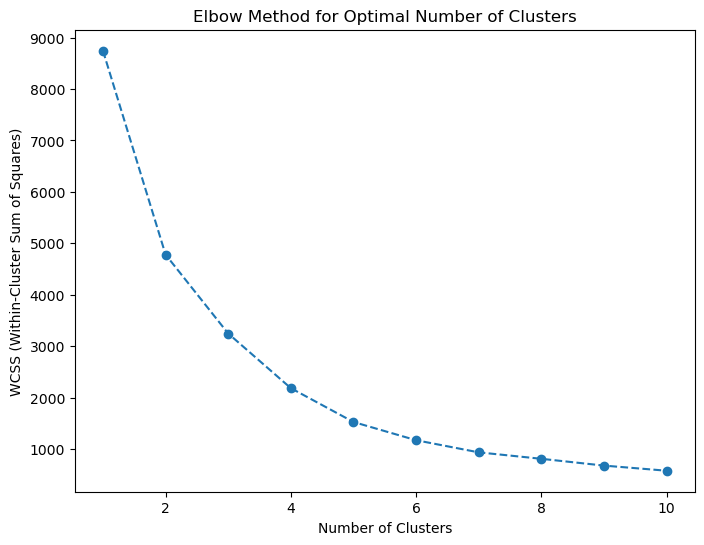

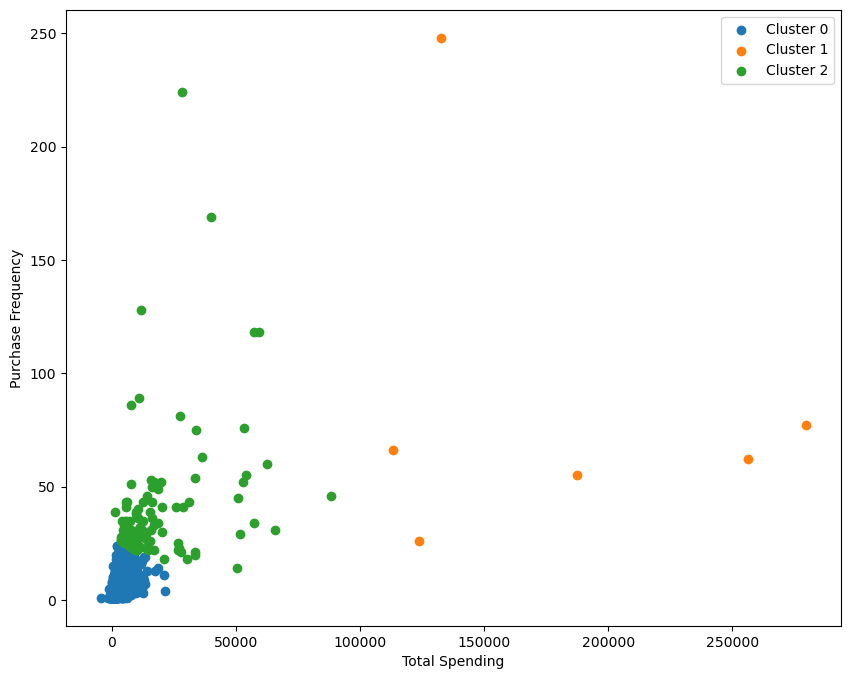

In [119]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have prepared your data, including 'TotalPrice' as described in a previous response.

# Calculate 'TotalSpending' (CLV) for each customer
total_spending = df.groupby('CustomerID')['TotalPrice'].sum()

# Calculate 'PurchaseFrequency' (number of unique invoices) for each customer
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Combine the calculated features into a new DataFrame
customer_data = pd.DataFrame({'TotalSpending': total_spending, 'PurchaseFrequency': purchase_frequency})

# Standardize the data (important for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Choose an appropriate number of clusters based on the elbow method (e.g., from the plot)
# Let's assume you choose 3 clusters
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add the cluster labels back to your customer_data DataFrame
customer_data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(customer_data[customer_data['Cluster'] == cluster]['TotalSpending'], customer_data[customer_data['Cluster'] == cluster]['PurchaseFrequency'], label=f'Cluster {cluster}')
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.show()
